#2022-01-13 Exam: Classification (data cleaning/inspection, cross validation)

The notebook must include appropriate comments and must operate as follows:
1. Load the data and explore them, showing size, structure and histograms
of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” (4pt)
2. Drop the rows with NaN values, if any, show the shape of the dataset
after this cleaning (4pt)
3. tune the hyper–parameters of Model1 with Cross Validation on the
training set, optimize for recall_macro (5pt)
4. produce a classification report for Model1 on the test set (2pt)
5. produce the confusion matrix for Model1 on the test set (2pt)
6. tune the hyper–parameters of Model2 with Cross Validation on the
training set, optimize for recall_macro (5pt)
7. produce a classification report for Model2 on the test set (1pt)
8. produce the confusion matrix for Model2 on the test set (1pt)


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

url = '/content/exam2022_01_13.csv'
df = pd.read_csv(url)

random_state = 42
train_size = 0.67

##1. Load the data and explore them, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “language” (4pt)

In [60]:
print('Size of data: {:6.2f}'.format(df.size))
df.head()

Size of data: 4277.00


,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [61]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,321.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.411215,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.027840,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.090180,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.327718,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.512083,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>]], dtype=object)

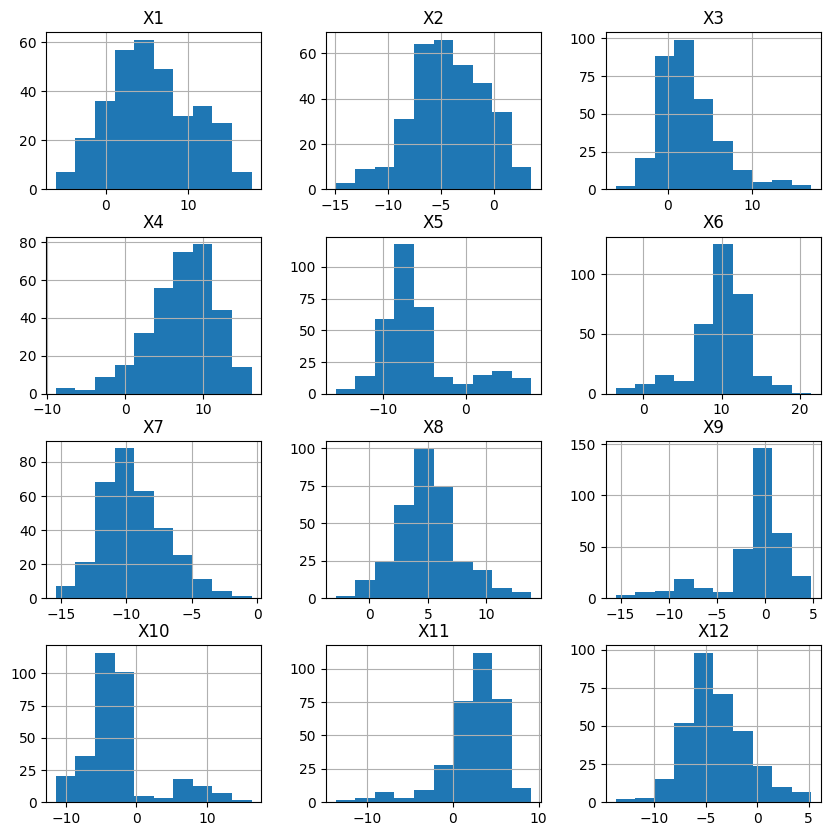

In [62]:
target = 'language'
pd.DataFrame.hist(df, figsize=(10,10))

<Axes: xlabel='language', ylabel='Count'>

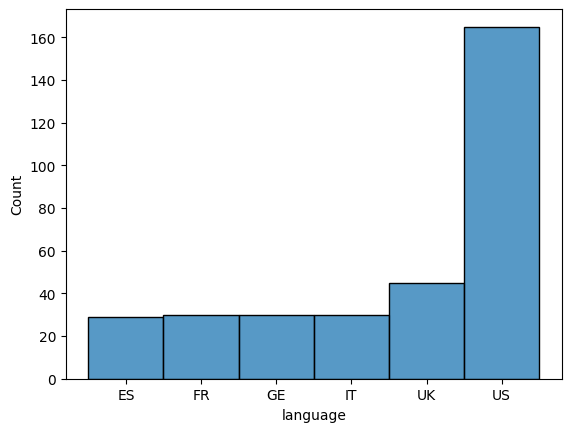

In [63]:
sns.histplot(df['language'])

##2. Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning (4pt)

In [64]:
initial_rows = df.shape[0]
df = df.dropna()
print('Removed {} rows with null values, new dataset shape is {}'.format(initial_rows - df.shape[0], df.shape))

Removed 8 rows with null values, new dataset shape is (321, 13)


##3. Tune the hyper–parameters of Model1 with Cross Validation on the training set, optimize for recall_macro (5pt)

I choose to use Decision Tree as Model1

In [65]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

target = 'language'
X = df.drop(target, axis=1).copy()
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size, random_state=random_state)

dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(Xtrain, ytrain)

tuned_params_dt = [{'max_depth' : list(np.arange(1, dt.tree_.max_depth+1)), 'random_state' : [random_state]}]
gs1 = GridSearchCV(dt , tuned_params_dt , scoring = 'recall_macro', refit=True)
gs1.fit(Xtrain, ytrain)
tuned_params_dt

[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state': [42]}]

##4. Produce a classification report for Model1 on the test set (2pt)

In [66]:
y_gs1 = gs1.predict(Xtest)

print('Best max depth for Decision Tree is {}'.format(gs1.best_params_['max_depth']))
print('Accuracy score on test set: {:.2f}%'.format(accuracy_score(ytest,y_gs1) * 100))
print(classification_report(ytest, y_gs1))

Best max depth for Decision Tree is 9
Accuracy score on test set: 63.21%
              precision    recall  f1-score   support

          ES       0.54      0.70      0.61        10
          FR       0.58      0.70      0.64        10
          GE       0.31      0.36      0.33        11
          IT       0.46      0.55      0.50        11
          UK       0.75      0.46      0.57        13
          US       0.79      0.73      0.76        51

    accuracy                           0.63       106
   macro avg       0.57      0.58      0.57       106
weighted avg       0.66      0.63      0.64       106



##5. Produce the confusion matrix for Model1 on the test set (2pt)

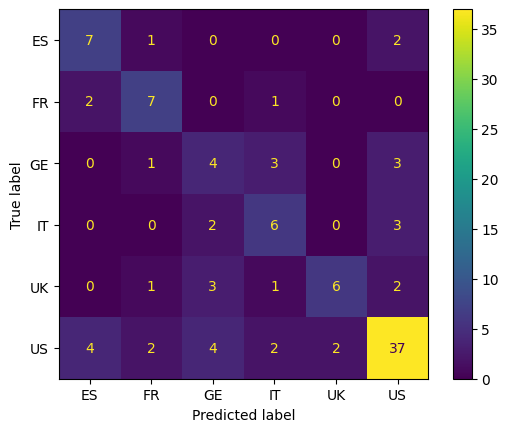

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, y_gs1)
CMD = ConfusionMatrixDisplay(cm, display_labels=['ES', 'FR', 'GE', 'IT', 'UK', 'US'])
CMD.plot()

##6. Tune the hyper–parameters of Model2 with Cross Validation on the training set, optimize for recall_macro (5pt)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

km_params = [{'n_neighbors' : list(np.arange(1,15))}]
km = KNeighborsClassifier()

gs2 = GridSearchCV(km, km_params, scoring='recall_macro', refit=True)
gs2.fit(Xtrain, ytrain)
km_params

[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}]

##7. Produce a classification report for Model2 on the test set (1pt)


In [69]:
y_gs2 = gs2.predict(Xtest)
print('K-neighbors best n_neighbors: {}'.format(gs2.best_params_['n_neighbors']))
print('Accuracy score: {:.2f}%'.format(accuracy_score(ytest, y_gs2) * 100))
print(classification_report(ytest, y_gs2))

K-neighbors best n_neighbors: 1
Accuracy score: 83.96%
              precision    recall  f1-score   support

          ES       0.89      0.80      0.84        10
          FR       0.80      0.80      0.80        10
          GE       0.77      0.91      0.83        11
          IT       0.89      0.73      0.80        11
          UK       0.73      0.62      0.67        13
          US       0.87      0.92      0.90        51

    accuracy                           0.84       106
   macro avg       0.82      0.80      0.81       106
weighted avg       0.84      0.84      0.84       106



##8. Produce the confusion matrix for Model2 on the test set (1pt)

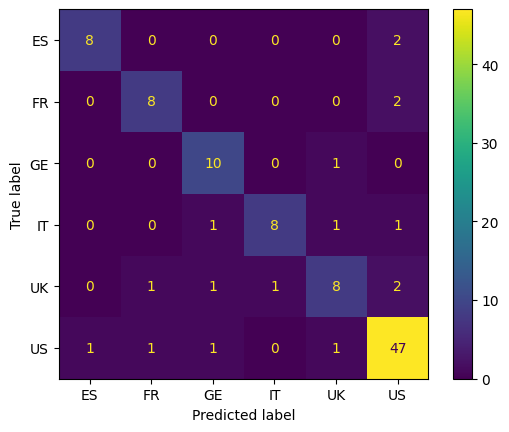

In [70]:
cm = confusion_matrix(ytest, y_gs2)
CMD = ConfusionMatrixDisplay(cm, display_labels=['ES', 'FR', 'GE', 'IT', 'UK', 'US'])
CMD.plot()